In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

#Possible Datasets
#NIPS4Bplus
#BIRDCLEF2020 DATASET
# SCRIPPS COASTAL RESREVE DATASET


#TODO USE SCRIPPS COASTAL RESREVE DATASET FOR STRONGLY LABELED TO 

In [3]:
path =  "./mixed_bird/Selected_Species/"#"./BirdCLEF2020_Validation_Audio_and_Ground_Truth/audio/min_audio/"
path_to_audio_files = path
path_to_ground_truth = "./mixed_bird/mixed_bird_manual.csv"#./BirdCLEF2020_Validation_Audio_and_Ground_Truth/BIRDCLEF2020_SPECIES_ID.csv"

#"C:\Users\seanh\OneDrive\Desktop\E4E\PyHa\mixed_bird\Mixed_Bird"
#"C:\Users\seanh\OneDrive\Desktop\E4E\PyHa\mixed_bird\mixed_bird_manual.csv"

# Prepare Manual Labels

In [4]:
manual_df = pd.read_csv(path_to_ground_truth)
manual_df["FOLDER"] = "MIXED_BIRD"
manual_df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,MIXED_BIRD
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,MIXED_BIRD
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,MIXED_BIRD
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,Aburria aburri Wattled Guan,184.388,alarce,11/22/2021,3:28:01,MIXED_BIRD
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,Aburria aburri Wattled Guan,184.385,alarce,11/22/2021,3:28:01,MIXED_BIRD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.174,JacobGlennAyers,10/10/2021,2:06:40,MIXED_BIRD
31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.135,JacobGlennAyers,10/10/2021,2:06:40,MIXED_BIRD
31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.527,JacobGlennAyers,10/18/2021,17:33:36,MIXED_BIRD
31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.543,JacobGlennAyers,10/18/2021,17:33:36,MIXED_BIRD


## Convert Strong Labels into Weakly Labeled Data

In [5]:
weakly_manual_df = manual_df.groupby(by=["IN FILE", "MANUAL ID"]).count().get(["FOLDER"])
weakly_manual_df["COUNTS"] = weakly_manual_df["FOLDER"]
weakly_manual_df = weakly_manual_df[["COUNTS"]]
weakly_manual_df = weakly_manual_df.reset_index()
#max_count_of_file = weakly_manual_df.groupby(by="IN FILE").max()
#max_count_of_file
weakly_manual_df

weak_label = pd.DataFrame()
for file in np.unique(weakly_manual_df["IN FILE"]):
    weakly_clip_df = weakly_manual_df[weakly_manual_df["IN FILE"] == file]
    weakly_clip_df = weakly_clip_df.sort_values(by="COUNTS", ascending=False)
    if (weak_label.empty):
        weak_label = weakly_clip_df.head(1)
    else:
        weak_label = weak_label.append(weakly_clip_df.head(1))
weak_label = weak_label.reset_index(drop=True).drop(labels="COUNTS", axis=1).set_index("IN FILE")
weak_label

,MANUAL ID
IN FILE,
Aburria-aburri-257423.wav,Aburria aburri Wattled Guan
Aburria-aburri-387212.wav,Aburria aburri Wattled Guan
Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk
Accipiter-collaris-260335.wav,Accipiter collaris Semicollared Hawk
Accipiter-collaris-260336.wav,Accipiter collaris Semicollared Hawk
...,...
Zimmerius-gracilipes-258668.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zimmerius-gracilipes-258669.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zonotrichia-capensis-232609.wav,Zonotrichia capensis Rufous-collared Sparrow


In [6]:
def mixed_bird_fix(manual_id):
    id_arr = manual_id.split(" ")
    return id_arr[0] + " " +  id_arr[1]

#weak_label["MANUAL ID"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label

,MANUAL ID
IN FILE,
Aburria-aburri-257423.wav,Aburria aburri Wattled Guan
Aburria-aburri-387212.wav,Aburria aburri Wattled Guan
Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk
Accipiter-collaris-260335.wav,Accipiter collaris Semicollared Hawk
Accipiter-collaris-260336.wav,Accipiter collaris Semicollared Hawk
...,...
Zimmerius-gracilipes-258668.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zimmerius-gracilipes-258669.wav,Zimmerius gracilipes Slender-footed Tyrannulet
Zonotrichia-capensis-232609.wav,Zonotrichia capensis Rufous-collared Sparrow


In [7]:
weak_label["SCIENTIFIC NAME"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label

,MANUAL ID,SCIENTIFIC NAME
IN FILE,,
Aburria-aburri-257423.wav,Aburria aburri Wattled Guan,Aburria aburri
Aburria-aburri-387212.wav,Aburria aburri Wattled Guan,Aburria aburri
Accipiter-bicolor-451839.wav,Accipiter bicolor Bicolored Hawk,Accipiter bicolor
Accipiter-collaris-260335.wav,Accipiter collaris Semicollared Hawk,Accipiter collaris
Accipiter-collaris-260336.wav,Accipiter collaris Semicollared Hawk,Accipiter collaris
...,...,...
Zimmerius-gracilipes-258668.wav,Zimmerius gracilipes Slender-footed Tyrannulet,Zimmerius gracilipes
Zimmerius-gracilipes-258669.wav,Zimmerius gracilipes Slender-footed Tyrannulet,Zimmerius gracilipes
Zonotrichia-capensis-232609.wav,Zonotrichia capensis Rufous-collared Sparrow,Zonotrichia capensis


In [8]:
def apply_weak_labels(df):
    def add_weak_label(filename):
        return weak_label.loc[filename]
    df = df[df["IN FILE"].isin(weak_label.index)] 
    df["MANUAL ID"] = df["IN FILE"].apply(add_weak_label)
    return df

# Select Spefific Species To Work With

In [9]:
species=["Myrmotherula iheringi", "Hemitriccus griseipectus", "Phaethornis malaris", "Ramphastos tucanus", "Vireo olivaceus", "Tyrannus tyrannus"]
weak_label_species = weak_label[weak_label["SCIENTIFIC NAME"].isin(species)]

In [10]:
weak_label_species.index.tolist()

['Hemitriccus-griseipectus-11801.wav',
 'Hemitriccus-griseipectus-284278.wav',
 'Hemitriccus-griseipectus-284279.wav',
 'Hemitriccus-griseipectus-284293.wav',
 'Myrmotherula-iheringi-226537.wav',
 'Myrmotherula-iheringi-226538.wav',
 'Myrmotherula-iheringi-474914.wav',
 'Myrmotherula-iheringi-491867.wav',
 'Myrmotherula-iheringi-554956.wav',
 'Phaethornis-malaris-553103.wav',
 'Phaethornis-malaris-553104.wav',
 'Ramphastos-tucanus-122630.wav',
 'Ramphastos-tucanus-123206.wav',
 'Ramphastos-tucanus-27859.wav',
 'Tyrannus-tyrannus-132630.wav',
 'Tyrannus-tyrannus-509628.wav',
 'Vireo-olivaceus-14089.wav',
 'Vireo-olivaceus-179656.wav',
 'Vireo-olivaceus-381598.wav',
 'Vireo-olivaceus-8545.wav']

In [11]:
manual_df = manual_df[manual_df["IN FILE"].isin(weak_label_species.index)]
manual_df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
11628,Hemitriccus-griseipectus-11801.wav,33.5151,8.7973,0.3700,24000,0,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,63.606,weszhen,12/01/2021,18:30:40,MIXED_BIRD
11629,Hemitriccus-griseipectus-11801.wav,33.5151,5.0979,0.3099,24000,0,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,63.603,weszhen,12/01/2021,18:30:40,MIXED_BIRD
11630,Hemitriccus-griseipectus-11801.wav,33.5151,5.6778,0.5999,24000,0,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,63.604,weszhen,12/01/2021,18:30:40,MIXED_BIRD
11631,Hemitriccus-griseipectus-11801.wav,33.5151,2.8082,0.9299,24000,0,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,63.600,weszhen,12/01/2021,18:30:40,MIXED_BIRD
11632,Hemitriccus-griseipectus-11801.wav,33.5151,6.9876,0.3300,24000,0,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,63.605,weszhen,12/01/2021,18:30:40,MIXED_BIRD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30401,Vireo-olivaceus-381598.wav,39.7200,32.1366,1.0600,24000,0,48000,Vireo olivaceus Red-eyed Vireo,147.460,alarce,10/29/2021,4:13:33,MIXED_BIRD
30402,Vireo-olivaceus-381598.wav,39.7200,34.2832,0.7700,24000,0,48000,Vireo olivaceus Red-eyed Vireo,147.460,alarce,10/29/2021,4:13:33,MIXED_BIRD
30403,Vireo-olivaceus-381598.wav,39.7200,35.5232,0.6600,24000,0,48000,Vireo olivaceus Red-eyed Vireo,147.461,alarce,10/29/2021,4:13:33,MIXED_BIRD
30404,Vireo-olivaceus-381598.wav,39.7200,36.7532,0.7800,24000,0,48000,Vireo olivaceus Red-eyed Vireo,147.461,alarce,10/29/2021,4:13:33,MIXED_BIRD


# Tweetynet


In [12]:
# Example parameters for TweetyNET
isolation_parameters = {
     "model" : "tweetynet",
     "tweety_output": True,
    "technique" : "steinberg",
     "threshold_type" : "median",
     "threshold_const" : 2.0,
     "threshold_min" : 0.0,
     "window_size" : 2.0,
     "chunk_size" : 5.0
}

In [13]:
automated_df_tweety = generate_automated_labels(path,isolation_parameters);
automated_df_tweety

20
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.862870
1    0_f     0      0   0.023256    -4.556316
2    0_f     0      0   0.046512    -3.326027
3    0_f     0      0   0.069767    -4.006081
4    0_f     0      0   0.093023    -3.498114
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -2.748082
82  15_f     0      0  31.906977    -2.259589
83  15_f     0      0  31.930233    -1.788653
84  15_f     0      0  31.953488    -1.722509
85  15_f     0      0  31.976744    -1.789784

[1376 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -3.862870
1    0_f     0      0   0.023256    -4.556316
2    0_f     0      0   0.046512    -3.326027
3    0_f     0      0   0.069767    -4.006081
4    0_f     0      0   0.093023    -3.498114
..   ...   ...    ...        ...          ...
81  15_f     0      0  31.883721    -2.748082
82  15_f     0      0  31.906977    -2.259589
83  15

     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -5.320179
1    0_f     0      0    0.023256    -4.811063
2    0_f     0      0    0.046512    -4.402633
3    0_f     0      0    0.069767    -5.096322
4    0_f     0      0    0.093023    -5.111951
..   ...   ...    ...         ...          ...
81  55_f     0      0  111.883721    -0.932817
82  55_f     0      0  111.906977    -0.795570
83  55_f     0      0  111.930233    -0.452980
84  55_f     1      0  111.953488     0.131542
85  55_f     1      0  111.976744     0.058161

[4816 rows x 5 columns]
     uid  pred  label   time_bins  local_score
0    0_f     0      0    0.000000    -5.320179
1    0_f     0      0    0.023256    -4.811063
2    0_f     0      0    0.046512    -4.402633
3    0_f     0      0    0.069767    -5.096322
4    0_f     0      0    0.093023    -5.111951
..   ...   ...    ...         ...          ...
81  55_f     0      0  111.883721    -0.932817
82  55_f     0      0  111.906977  

     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.674976
1    0_f     0      0   0.023256    -5.307405
2    0_f     0      0   0.046512    -6.065407
3    0_f     0      0   0.069767    -5.705104
4    0_f     0      0   0.093023    -5.236485
..   ...   ...    ...        ...          ...
81  20_f     0      0  41.883721    -4.812392
82  20_f     0      0  41.906977    -3.811374
83  20_f     0      0  41.930233    -3.389459
84  20_f     0      0  41.953488    -2.727098
85  20_f     0      0  41.976744    -3.454563

[1806 rows x 5 columns]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -4.674976
1    0_f     0      0   0.023256    -5.307405
2    0_f     0      0   0.046512    -6.065407
3    0_f     0      0   0.069767    -5.705104
4    0_f     0      0   0.093023    -5.236485
..   ...   ...    ...        ...          ...
81  20_f     0      0  41.883721    -4.812392
82  20_f     0      0  41.906977    -3.811374
83  20_f 

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,2.813953,0.930233,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,bird,0.964810
1,5.069767,0.372093,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,bird,0.581615
2,5.697674,0.558140,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,bird,0.704885
3,6.930233,0.418605,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,bird,0.509122
4,8.790698,0.348837,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,bird,0.229348
...,...,...,...,...,...,...,...,...,...
1075,36.604651,1.186047,./mixed_bird/Selected_Species/,Vireo-olivaceus-381598.wav,0,39.720000,44100,bird,0.742084
1076,0.837209,0.813953,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,bird,1.000000
1077,4.023256,1.325581,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,bird,0.825611
1078,7.116279,0.069767,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,bird,0.302095


In [14]:
automated_df_tweety = apply_weak_labels(automated_df_tweety)
automated_df_tweety

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,2.813953,0.930233,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,0.964810
1,5.069767,0.372093,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,0.581615
2,5.697674,0.558140,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,0.704885
3,6.930233,0.418605,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,0.509122
4,8.790698,0.348837,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,0,33.515102,44100,Hemitriccus griseipectus White-bellied Tody-Ty...,0.229348
...,...,...,...,...,...,...,...,...,...
1075,36.604651,1.186047,./mixed_bird/Selected_Species/,Vireo-olivaceus-381598.wav,0,39.720000,44100,Vireo olivaceus Red-eyed Vireo,0.742084
1076,0.837209,0.813953,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,Vireo olivaceus Red-eyed Vireo,1.000000
1077,4.023256,1.325581,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,Vireo olivaceus Red-eyed Vireo,0.825611
1078,7.116279,0.069767,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,Vireo olivaceus Red-eyed Vireo,0.302095


In [15]:
clip_stat_df_tweety = clip_statistics(automated_df_tweety, manual_df,stats_type = "general", threshold = 0.5)
clip_stat_df_tweety

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-11801.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,6.376440,0.600340,0.832902,25.705397,7.809683,0.913952,0.884469,0.898969,0.816479
1,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,19.464512,26.248549,4.037914,72.031882,49.750975,0.425798,0.828192,0.562432,0.391239
2,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284279.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,14.280000,3.608027,1.389478,6.191882,19.277506,0.798299,0.911326,0.851076,0.740760
3,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284293.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,35.015488,3.756485,1.771111,20.531202,40.543084,0.903113,0.951854,0.926844,0.863661
4,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-226537.wav,Myrmotherula iheringi Ihering's Antwren,30.571746,6.755918,0.395782,11.092540,37.723447,0.819010,0.987219,0.895283,0.810418
5,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-226538.wav,Myrmotherula iheringi Ihering's Antwren,22.268526,24.545465,3.190590,24.731406,50.004580,0.475681,0.874678,0.616233,0.445330
6,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-474914.wav,Myrmotherula iheringi Ihering's Antwren,36.935918,3.693583,7.839388,11.579093,48.468889,0.909091,0.824917,0.864961,0.762054
7,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-491867.wav,Myrmotherula iheringi Ihering's Antwren,60.705306,1.236100,0.403832,15.107823,62.345238,0.980044,0.993392,0.986673,0.973696
8,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-554956.wav,Myrmotherula iheringi Ihering's Antwren,67.113197,1.413401,0.834218,43.305306,69.360816,0.979374,0.987723,0.983531,0.967595
9,./mixed_bird/Selected_Species/,Phaethornis-malaris-553103.wav,Phaethornis malaris Great-billed Hermit,202.673628,9.038730,39.324263,20.140522,251.036621,0.957307,0.837502,0.893406,0.807347


In [16]:
class_statistics(clip_stat_df_tweety)

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,Hemitriccus griseipectus White-bellied Tody-Ty...,75.136440,8.031406,34.213401,0.6871,0.9034,0.7806
1,Myrmotherula iheringi Ihering's Antwren,217.594694,12.663810,37.644467,0.8525,0.9450,0.8964
2,Phaethornis malaris Great-billed Hermit,233.955805,53.024354,14.593991,0.9413,0.8152,0.8737
3,Ramphastos tucanus White-throated Toucan,209.066236,8.846168,17.863515,0.9213,0.9594,0.9400
4,Tyrannus tyrannus Eastern Kingbird,140.725873,11.081882,28.662857,0.8308,0.9270,0.8763
5,Vireo olivaceus Red-eyed Vireo,122.216213,23.688685,44.126440,0.7347,0.8376,0.7828


In [17]:
global_dataset_statistics(clip_stat_df_tweety)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.849375,0.894863,0.871526,0.772305


1080
835
target 601
confidence 601
automated df 601


0.8738127090301004

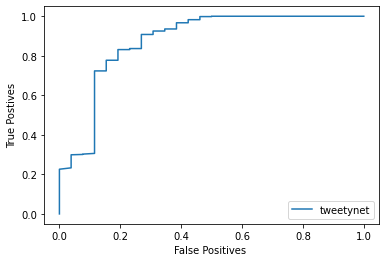

In [19]:
%reload_ext autoreload
generate_ROC_curves(automated_df_tweety, manual_df, chunk_length = 3, label="tweetynet")

170
143
target 79
confidence 79
automated df 79
176
67
target 122
confidence 122
automated df 122
262
113
target 115
confidence 115
automated df 115
104
164
target 104
confidence 104
automated df 104
147
124
target 83
confidence 83
automated df 83
221
224
target 98
confidence 98
automated df 98


C:\ProgramData\Miniconda3\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


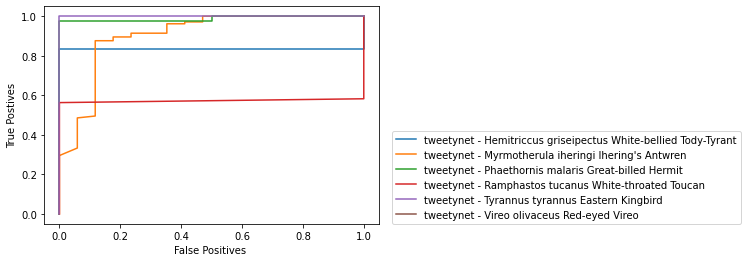

In [23]:
%reload_ext autoreload
generate_ROC_curves_mutliclass(automated_df_tweety, manual_df, label="tweetynet", chunk_length=3)

# Mircofaune

In [24]:
isolation_parameters_micro = {
    "model" : "microfaune",
    "technique" : "chunk",
    "threshold_type" : "median",
    "threshold_const" : 4.0,
    "threshold_min" : 0.25,
    "window_size" : 2.0,
    "chunk_size" : 3.0
}

In [25]:
automated_df_micro = generate_automated_labels(path,isolation_parameters_micro);
automated_df_micro

1/1 [==============================] - 1s 786ms/step


,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID,CONFIDENCE
0,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,0,121.782857,44100,0.0,3.000000,bird,0.778817
1,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,0,121.782857,44100,3.0,3.000000,bird,0.801891
2,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,0,121.782857,44100,6.0,3.000000,bird,0.607253
3,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,0,121.782857,44100,15.0,3.000000,bird,0.502683
4,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,0,121.782857,44100,18.0,3.000000,bird,0.372588
...,...,...,...,...,...,...,...,...,...
359,./mixed_bird/Selected_Species/,Vireo-olivaceus-381598.wav,0,39.720000,44100,33.0,3.000000,bird,0.695241
360,./mixed_bird/Selected_Species/,Vireo-olivaceus-381598.wav,0,39.720000,44100,36.0,3.000000,bird,0.771706
361,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,0.0,3.000000,bird,0.948234
362,./mixed_bird/Selected_Species/,Vireo-olivaceus-8545.wav,0,11.389388,44100,6.0,3.000000,bird,0.865222


In [26]:
automated_df_micro = apply_weak_labels(automated_df_micro)

In [27]:
clip_stat_df_micro = clip_statistics(automated_df_micro, manual_df,stats_type = "general", threshold = 0.5)
clip_stat_df_micro


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284278.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,9.950567,47.049433,13.551859,51.230998,70.551859,0.174571,0.423385,0.247212,0.141039
1,./mixed_bird/Selected_Species/,Hemitriccus-griseipectus-284293.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,7.468594,1.531406,29.318005,22.756281,38.318005,0.829844,0.203025,0.326235,0.194911
2,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-226537.wav,Myrmotherula iheringi Ihering's Antwren,27.106531,14.893469,3.860998,2.954989,45.860998,0.645394,0.875321,0.742975,0.591058
3,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-226538.wav,Myrmotherula iheringi Ihering's Antwren,22.456009,46.279977,3.003107,2.996893,71.739093,0.326699,0.882042,0.476798,0.313023
4,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-474914.wav,Myrmotherula iheringi Ihering's Antwren,43.927800,10.072200,0.847506,5.200476,54.847506,0.813478,0.981072,0.889449,0.800908
5,./mixed_bird/Selected_Species/,Myrmotherula-iheringi-554956.wav,Myrmotherula iheringi Ihering's Antwren,61.476508,12.189615,6.470907,32.529093,80.137029,0.834529,0.904766,0.868229,0.767142
6,./mixed_bird/Selected_Species/,Phaethornis-malaris-553103.wav,Phaethornis malaris Great-billed Hermit,162.377891,24.799252,79.620000,4.380000,266.797143,0.867509,0.670989,0.756698,0.608619
7,./mixed_bird/Selected_Species/,Phaethornis-malaris-553104.wav,Phaethornis malaris Great-billed Hermit,44.982268,31.321406,0.000000,0.000000,76.303673,0.589516,1.000000,0.741756,0.589516
8,./mixed_bird/Selected_Species/,Ramphastos-tucanus-122630.wav,Ramphastos tucanus White-throated Toucan,1.600000,1.400000,39.438980,51.209002,42.438980,0.533333,0.038987,0.072663,0.037701
9,./mixed_bird/Selected_Species/,Ramphastos-tucanus-123206.wav,Ramphastos tucanus White-throated Toucan,55.313923,18.894059,24.208685,20.791315,98.416667,0.745390,0.695575,0.719622,0.562038


In [28]:
class_statistics(clip_stat_df_micro)

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,Hemitriccus griseipectus White-bellied Tody-Ty...,17.419161,42.869864,48.580839,0.2639,0.2889,0.2759
1,Myrmotherula iheringi Ihering's Antwren,154.966848,14.182517,83.435261,0.6500,0.9162,0.7605
2,Phaethornis malaris Great-billed Hermit,207.360159,79.620000,56.120658,0.7870,0.7226,0.7534
3,Ramphastos tucanus White-throated Toucan,131.943129,85.969274,24.265669,0.8447,0.6055,0.7053
4,Tyrannus tyrannus Eastern Kingbird,149.857052,1.950703,95.671111,0.6103,0.9872,0.7543
5,Vireo olivaceus Red-eyed Vireo,64.418050,1.163810,47.337052,0.5764,0.9823,0.7265


In [29]:
global_dataset_statistics(clip_stat_df_micro)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.671335,0.762792,0.714147,0.555388


364
661


C:\Users\seanh\Desktop\e4e\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 496
confidence 496
automated df 496


0.5817834394904459

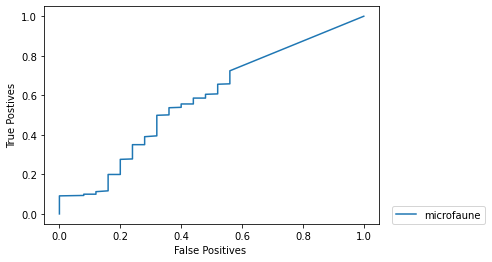

In [30]:
generate_ROC_curves(automated_df_micro, manual_df, chunk_length = 3, label="microfaune")

22
99


C:\Users\seanh\Desktop\e4e\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 60
confidence 60
automated df 60
80
57


C:\Users\seanh\Desktop\e4e\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 97
confidence 97
automated df 97
89
113
target 115
confidence 115
automated df 115
53
164
target 104
confidence 104
automated df 104
82
124
target 83
confidence 83
automated df 83
38
104


C:\Users\seanh\Desktop\e4e\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 37
confidence 37
automated df 37


C:\ProgramData\Miniconda3\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


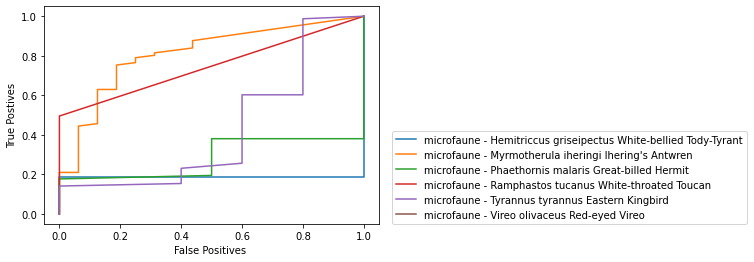

In [31]:
generate_ROC_curves_mutliclass(automated_df_micro, manual_df, label="microfaune", chunk_length=3)

# Birdnet

In [32]:
isolation_parameters_birdnet = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}

In [48]:
automated_df_birdnet = generate_automated_labels(path,isolation_parameters_birdnet);

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 41 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 41 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... DONE! READ 25 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 25 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 26 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 26 RESULTS.
READING AUDIO DATA... DONE! READ 38 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.1 SECONDS
DONE!

FileNotFoundError: [Errno 2] No such file or directory: './BirdCLEF2020_Validation_Audio_and_Ground_Truth/birdnet_species_to_code.csv'

In [50]:
#For other files
#automated_df_birdnet_test = automated_df_birdnet
#automated_df_birdnet_test["MANUAL ID"] = automated_df_birdnet["MANUAL ID"].apply(birdnet_species_to_code)
#automated_df_birdnet_test = automated_df_birdnet_test[automated_df_birdnet_test["MANUAL ID"] != ""]

In [51]:
automated_df_birdnet

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,0.0,3.0,48000,Graydidascalus brachyurus,0.086033
1,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,3.0,3.0,48000,Hemitriccus griseipectus,0.958464
2,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,6.0,3.0,48000,Hemitriccus griseipectus,0.973620
3,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,9.0,3.0,48000,Hemitriccus griseipectus,0.965500
4,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,12.0,3.0,48000,Hemitriccus griseipectus,0.946824
...,...,...,...,...,...,...,...,...,...
604,.\mixed_bird\Selected_Species\,Vireo-olivaceus-381598.wav,39.720000,0,36.0,3.0,48000,Vireo olivaceus,0.596736
605,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,0.0,3.0,48000,Vireo chivi,0.938404
606,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,3.0,3.0,48000,Pycnonotus jocosus,0.182475
607,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,6.0,3.0,48000,Vireo chivi,0.662427


In [53]:
def mixed_bird_fix(manual_id):
    id_arr = manual_id.split(" ")
    return id_arr[0] + " " +  id_arr[1]

#weak_label["MANUAL ID"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label["BIRDNET ID 2"] = weak_label["MANUAL ID"].apply(mixed_bird_fix)
weak_label = weak_label.groupby(by="BIRDNET ID 2").max()
weak_label



,MANUAL ID,SCIENTIFIC NAME,BIRDNET ID
BIRDNET ID 2,,,
Aburria aburri,Aburria aburri Wattled Guan,Aburria aburri,Aburria aburri
Accipiter bicolor,Accipiter bicolor Bicolored Hawk,Accipiter bicolor,Accipiter bicolor
Accipiter collaris,Accipiter collaris Semicollared Hawk,Accipiter collaris,Accipiter collaris
Accipiter poliogaster,Accipiter poliogaster Grey-bellied Hawk,Accipiter poliogaster,Accipiter poliogaster
Accipiter striatus,Accipiter striatus Sharp-shinned Hawk,Accipiter striatus,Accipiter striatus
...,...,...,...
Zentrygon frenata,Zentrygon frenata White-throated Quail-Dove,Zentrygon frenata,Zentrygon frenata
Zimmerius bolivianus,Zimmerius bolivianus Bolivian Tyrannulet,Zimmerius bolivianus,Zimmerius bolivianus
Zimmerius cinereicapilla,Zimmerius cinereicapilla Red-billed Tyrannulet,Zimmerius cinereicapilla,Zimmerius cinereicapilla


In [63]:
def birdnet_species_to_code(species):
    try:
        return weak_label.loc[species]["MANUAL ID"]
    except:
        return ""

In [64]:
print(birdnet_species_to_code("Zentrygon frenata"))
    
automated_df_birdnet_test = automated_df_birdnet
automated_df_birdnet_test["MANUAL ID 2"] = automated_df_birdnet["MANUAL ID"].apply(birdnet_species_to_code)
automated_df_birdnet_test #= #automated_df_birdnet_test[automated_df_birdnet_test["MANUAL ID"] != ""]
#automated_df_birdnet_test
input()

Zentrygon frenata White-throated Quail-Dove


,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE,MANUAL ID 2
0,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,0.0,3.0,48000,Graydidascalus brachyurus,0.086033,
1,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,3.0,3.0,48000,Hemitriccus griseipectus,0.958464,Hemitriccus griseipectus White-bellied Tody-Ty...
2,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,6.0,3.0,48000,Hemitriccus griseipectus,0.973620,Hemitriccus griseipectus White-bellied Tody-Ty...
3,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,9.0,3.0,48000,Hemitriccus griseipectus,0.965500,Hemitriccus griseipectus White-bellied Tody-Ty...
4,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,12.0,3.0,48000,Hemitriccus griseipectus,0.946824,Hemitriccus griseipectus White-bellied Tody-Ty...
...,...,...,...,...,...,...,...,...,...,...
604,.\mixed_bird\Selected_Species\,Vireo-olivaceus-381598.wav,39.720000,0,36.0,3.0,48000,Vireo olivaceus,0.596736,Vireo olivaceus Red-eyed Vireo
605,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,0.0,3.0,48000,Vireo chivi,0.938404,
606,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,3.0,3.0,48000,Pycnonotus jocosus,0.182475,
607,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,6.0,3.0,48000,Vireo chivi,0.662427,


In [40]:
def birdnet_species_to_code(species):
    try:
        return weak_label.loc[species]["MANUAL ID"]
    except:
        return ""
birdnet_species_to_code("Aeronautes montivagus")

'Aeronautes montivagus White-tipped Swift'

In [65]:
automated_df_birdnet_test["MANUAL ID"] = automated_df_birdnet_test["MANUAL ID 2"]

In [46]:
automated_df_birdnet

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,0.0,3.0,48000,,0.086033
1,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,3.0,3.0,48000,,0.958464
2,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,6.0,3.0,48000,,0.973620
3,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,9.0,3.0,48000,,0.965500
4,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,33.515104,0,12.0,3.0,48000,,0.946824
...,...,...,...,...,...,...,...,...,...
604,.\mixed_bird\Selected_Species\,Vireo-olivaceus-381598.wav,39.720000,0,36.0,3.0,48000,,0.596736
605,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,0.0,3.0,48000,,0.938404
606,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,3.0,3.0,48000,,0.182475
607,.\mixed_bird\Selected_Species\,Vireo-olivaceus-8545.wav,11.389396,0,6.0,3.0,48000,,0.662427


In [66]:
clip_stat_df_birdnet = clip_statistics(automated_df_birdnet_test, manual_df,stats_type = "general", threshold = 0)
clip_stat_df_birdnet


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-11801.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,7.017521,22.982479,0.191792,3.323313,30.191792,0.233917,0.973397,0.377192,0.232431
1,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-284278.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,23.502500,95.280375,0.000000,3.000000,118.782875,0.197861,1.000000,0.330357,0.197861
2,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-284279.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,15.069479,8.930521,0.600000,0.869396,24.600000,0.627895,0.961709,0.759752,0.612580
3,.\mixed_bird\Selected_Species\,Hemitriccus-griseipectus-284293.wav,Hemitriccus griseipectus White-bellied Tody-Ty...,22.490625,10.509375,14.296000,13.778292,47.296000,0.681534,0.611380,0.644554,0.475529
4,.\mixed_bird\Selected_Species\,Myrmotherula-iheringi-226537.wav,Myrmotherula iheringi Ihering's Antwren,27.997292,5.002708,2.970188,12.845812,35.970188,0.848403,0.904087,0.875360,0.778347
5,.\mixed_bird\Selected_Species\,Myrmotherula-iheringi-226538.wav,Myrmotherula iheringi Ihering's Antwren,6.616208,2.383792,18.842917,46.893083,27.842917,0.735134,0.259876,0.384003,0.237626
6,.\mixed_bird\Selected_Species\,Myrmotherula-iheringi-474914.wav,Myrmotherula iheringi Ihering's Antwren,44.775312,9.224687,0.000000,6.048000,54.000000,0.829172,1.000000,0.906609,0.829172
7,.\mixed_bird\Selected_Species\,Myrmotherula-iheringi-491867.wav,Myrmotherula iheringi Ihering's Antwren,56.914708,8.538354,4.194396,7.805604,69.647458,0.869550,0.931362,0.899395,0.817183
8,.\mixed_bird\Selected_Species\,Myrmotherula-iheringi-554956.wav,Myrmotherula iheringi Ihering's Antwren,64.798146,10.201854,3.149188,34.516937,78.149187,0.863975,0.953653,0.906602,0.829160
9,.\mixed_bird\Selected_Species\,Ramphastos-tucanus-122630.wav,Ramphastos tucanus White-throated Toucan,40.923083,49.076917,0.115896,3.532104,90.115896,0.454701,0.997176,0.624594,0.454116


In [67]:
class_statistics(clip_stat_df_birdnet)

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,Hemitriccus griseipectus White-bellied Tody-Ty...,68.080125,15.087792,137.702750,0.3308,0.8186,0.4712
1,Myrmotherula iheringi Ihering's Antwren,201.101667,29.156688,35.351396,0.8505,0.8734,0.8618
2,Ramphastos tucanus White-throated Toucan,216.947583,0.964896,91.260417,0.7039,0.9956,0.8247
3,Tyrannus tyrannus Eastern Kingbird,150.918187,0.889604,85.609979,0.6381,0.9941,0.7773
4,Vireo olivaceus Red-eyed Vireo,105.471729,37.744125,89.528271,0.5409,0.7365,0.6237


In [68]:
global_dataset_statistics(clip_stat_df_birdnet)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.628204,0.89854,0.739438,0.586594


609
835
target 601
confidence 601
automated df 601


0.8894983277591973

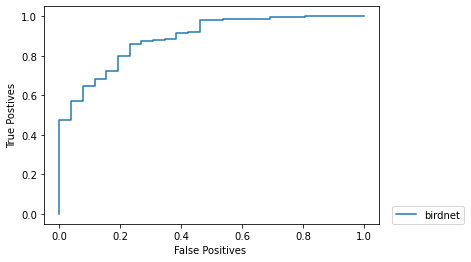

In [69]:
%reload_ext autoreload
generate_ROC_curves(automated_df_birdnet_test, manual_df, chunk_length = 3, label="birdnet")

69
143
target 79
confidence 79
automated df 79
79
67
target 122
confidence 122
automated df 122
103
164
target 104
confidence 104
automated df 104
79
124
target 83
confidence 83
automated df 83
65
220


C:\Users\seanh\Desktop\e4e\PyHa\PyHa\annotation_post_processing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 95
confidence 95
automated df 95


C:\ProgramData\Miniconda3\envs\species-id\lib\site-packages\sklearn\metrics\_ranking.py:943: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


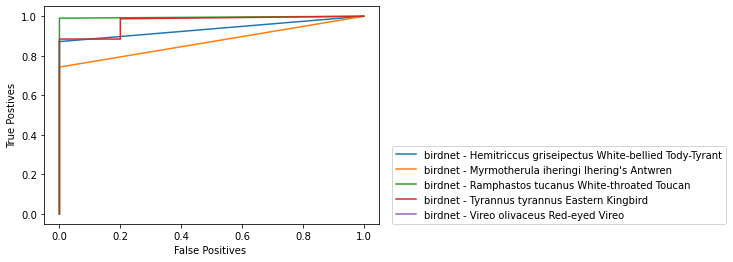

In [70]:
%reload_ext autoreload
generate_ROC_curves_mutliclass(automated_df_birdnet_test, manual_df, label="birdnet", chunk_length=3)